<font size="6">Import Libarary</font>

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

<font size="6">Loading Data</font>

In [2]:
transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','Transactions')
demographic_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerDemographic')
address_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerAddress')

# Data cleaning --- transaction

In [3]:
# check basic info
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 13 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                         --------------  ----- 
 0   Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   20002 non-null  object
 1   Unnamed: 1                                                                                                                                                                     20002 non-null  object
 2   Unnamed: 2                                                                

In [4]:
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,94,86,1,2017-12-23 00:00:00,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482
2,3765,38,1,2017-04-06 00:00:00,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526
3,5157,47,1,2017-05-11 00:00:00,True,Approved,Trek Bicycles,Road,low,small,1720.7,1531.42,37823
4,9785,72,1,2017-01-05 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,360.4,270.3,37873


In [5]:
transaction_df.describe()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,20002,20002,20002,20002,19642,20002,19805,19805,19805,19805,20002.00,19805.00,19805
unique,20002,103,3496,366,4,4,8,6,5,5,298.00,105.00,102
top,transaction_id,0,2476,2017-08-18 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [6]:
transaction_df.columns = transaction_df.iloc[0] # change the column names to the first row
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True) # drop the first row
transaction_df.drop(index=transaction_df.index[-1], axis=0, inplace=True)


In [7]:
# Inspect missing values in the dataset
# Replace the ' 's with NaN
transaction_df = transaction_df.replace(" ",np.NaN)
# Impute the missing numerical values with mean imputation
transaction_df = transaction_df.fillna(transaction_df.mean(numeric_only=True))
# Count the number of NaNs in the dataset to verify
print(transaction_df.isnull().values.sum())

1542


In [8]:
# for categorical missing value, change null value with mode
for col in transaction_df.columns:
    # Check if the column is of object type
    if transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(transaction_df.isnull().values.sum()) # check is there any other null value

0


In [9]:
# check for any other missing value
transaction_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

# Data Cleaning --- demographic

In [10]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3999 non-null   float64
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [11]:
demographic_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,720,Darrel Canet,Male,67,1931-10-23 00:00:00,92.0,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1,1092,Katlin Creddon,Female,56,1935-08-22 00:00:00,88.0,VP Quality Control,Retail,Mass Customer,N,No,5.0
2,3410,Merrili Brittin,Female,93,1940-09-22 00:00:00,83.0,NaN,Property,Mass Customer,N,No,16.0
3,2413,Abbey Murrow,Male,27,1943-08-11 00:00:00,80.0,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
4,658,Donn Bonnell,Male,38,1944-01-24 00:00:00,80.0,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0


In [12]:
# Inspect missing values in the dataset
# Replace the ' 's with NaN
demographic_df = demographic_df.replace(" ",np.NaN)
# # Impute the missing numerical values with mean imputation
demographic_df = demographic_df.fillna(demographic_df.mean(numeric_only=True))
# # Count the number of NaNs in the dataset to verify
print(demographic_df.isnull().values.sum())

1249


In [13]:
for col in demographic_df.columns:
    # Check if the column is of object type
    if demographic_df[col].dtypes == 'object':
        # Impute with the most frequent value
        demographic_df[col] = demographic_df[col].fillna(demographic_df[col].value_counts().index[0])
        if col == 'gender':
            demographic_df[col] = demographic_df[col].replace('U',demographic_df[col].value_counts().index[0])
    if col == 'age':
        demographic_df[col] = demographic_df[col].replace(124, demographic_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(demographic_df.isnull().values.sum())

0


In [14]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  4000 non-null   object 
 5   age                                  4000 non-null   float64
 6   job_title                            4000 non-null   object 
 7   job_industry_category                4000 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

# Data Cleaning --- address

In [15]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                         --------------  ----- 
 0   Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   4000 non-null   object
 1   Unnamed: 1                                                                                                                                                                     4000 non-null   object
 2   Unnamed: 2                                                                   

In [16]:
address_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [17]:
address_df.columns = address_df.iloc[0]
address_df = address_df[1:]
address_df.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [18]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


# Join three tables

In [19]:
# join three tables
df1 = transaction_df.merge(demographic_df, how = 'inner', left_on='customer_id', right_on='customer_id').sort_values(['customer_id']).reset_index()
df = df1.merge(address_df, how = 'inner', left_on='customer_id', right_on='customer_id').sort_values(['customer_id']).reset_index()
df

,level_0,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,0,0,94,86,1,2017-12-23,False,Approved,OHM Cycles,Standard,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,10,5,13644,25,1,2017-05-19,False,Approved,Giant Bicycles,Road,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
2,8,2,5157,47,1,2017-05-11,True,Approved,Trek Bicycles,Road,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
3,7,3,9785,72,1,2017-01-05,False,Approved,Norco Bicycles,Standard,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
4,6,4,13424,2,1,2017-02-21,False,Approved,Solex,Standard,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,19964,19995,14870,22,3500,2017-01-11,False,Approved,WeareA2B,Standard,...,Entertainment,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19964,19966,19992,6309,69,3500,2017-01-09,True,Approved,Giant Bicycles,Road,...,Entertainment,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19965,19962,19994,8562,33,3500,2017-08-08,False,Approved,Giant Bicycles,Standard,...,Entertainment,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19966,19963,19993,8416,74,3500,2017-02-16,False,Approved,WeareA2B,Standard,...,Entertainment,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10


# EDA Analysis

Text(0, 0.5, 'Count')

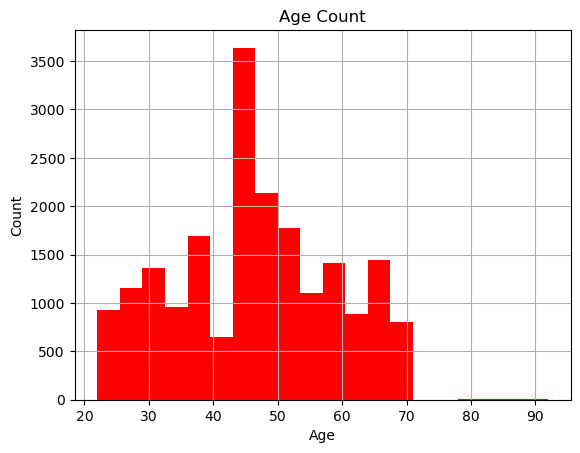

In [20]:
# creating histogram
# age count
df['age'].hist(bins = 20, color = 'red')
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count')

from age count, we can see that most of the age falls within the 30-70 year range. The most frequent age group is 45-50 years.There are a few data of age over 70 years, which can be treated as outliers or a small group if older individuals in the dataset.

Text(0, 0.5, 'Count')

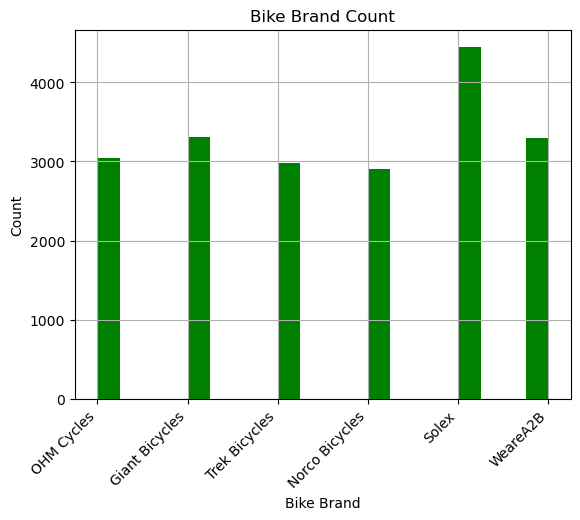

In [21]:
# bike brand count
df['brand'].hist(bins = 20, color = 'green')
plt.title('Bike Brand Count')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Bike Brand')
plt.ylabel('Count')

The brand ' Solex' has more purchases than the rest brands.

Text(0, 0.5, 'Count')

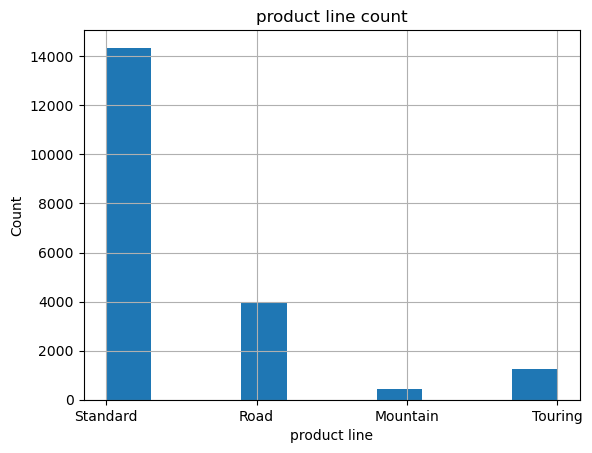

In [22]:
# online vs in store
df['product_line'].hist()
plt.title('product line count')
plt.xlabel('product line')
plt.ylabel('Count')

Standard bike has the most purchases

Text(0, 0.5, 'Count')

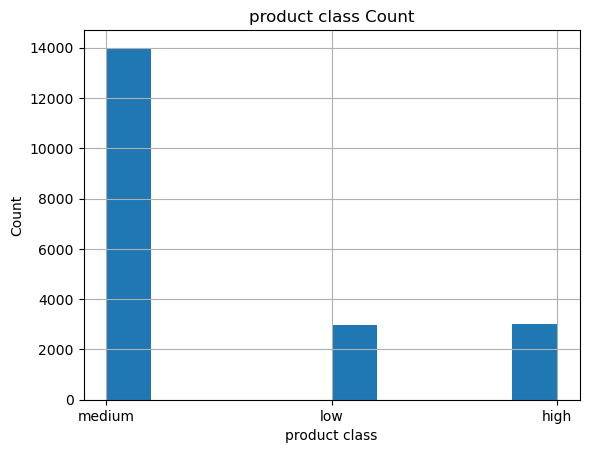

In [23]:
# product class count
df['product_class'].hist()
plt.title('product class Count') 
plt.xlabel('product class')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

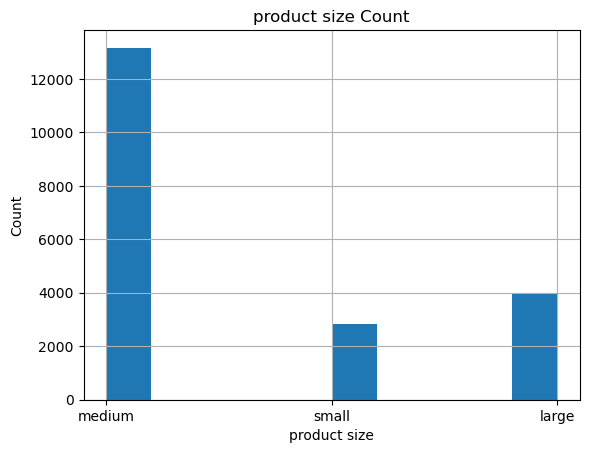

In [24]:
# product size count
df['product_size'].hist()
plt.title('product size Count') 
plt.xlabel('product size')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

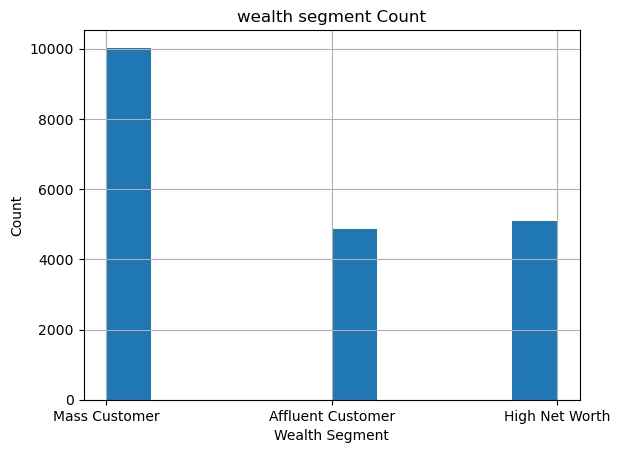

In [25]:
# wealth segment count
df['wealth_segment'].hist()
plt.title('wealth segment Count') 
plt.xlabel('Wealth Segment')
plt.ylabel('Count')

The majority of the customers are mass customers with 10000 count, while affluent customer and high net worth customer each has approximately 5k count.

Text(0, 0.5, 'Count')

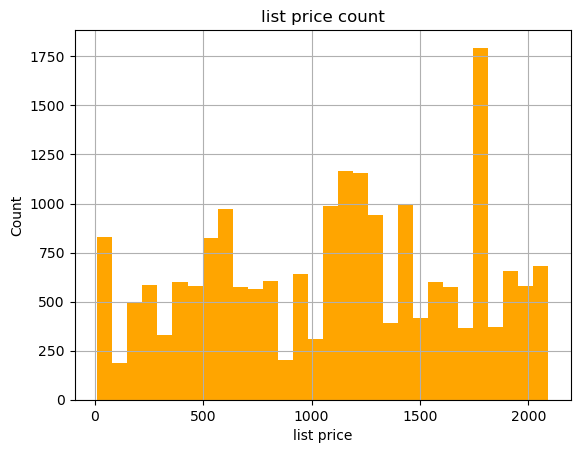

In [26]:
# histogram of list price
df['list_price'].hist(bins = 30, color = 'orange')
plt.title('list price count') 
plt.xlabel('list price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

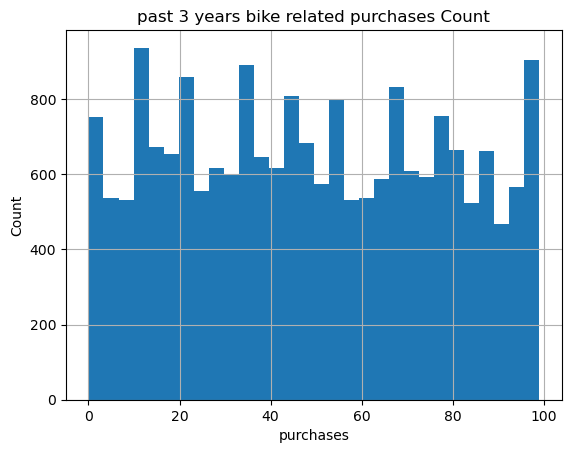

In [27]:
# 3 year bike related purchases count
df['past_3_years_bike_related_purchases'].hist(bins = 30)
plt.title('past 3 years bike related purchases Count') 
plt.xlabel('purchases')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

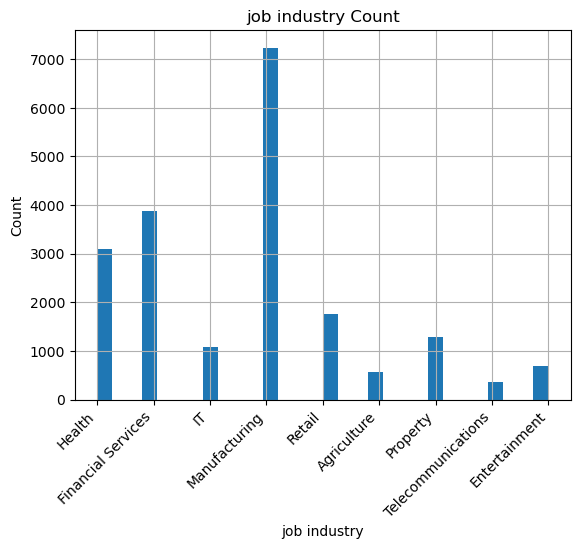

In [28]:
# job industry category count
df['job_industry_category'].hist(bins = 30)
plt.title('job industry Count') 
plt.xticks(rotation=45, ha='right') 
plt.xlabel('job industry')
plt.ylabel('Count')

<Axes: xlabel='product_line', ylabel='age'>

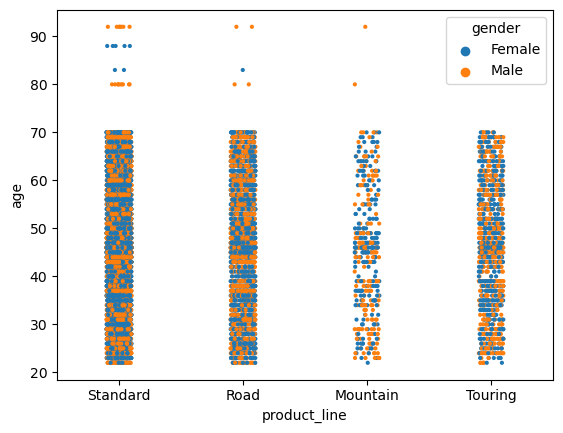

In [29]:
# strip plot
sns.stripplot(x = 'product_line',y='age',hue = 'gender',data= df, jitter = True, color = None, size=3,edgecolor="gray",linewidth=0)


<Axes: xlabel='product_line', ylabel='age'>

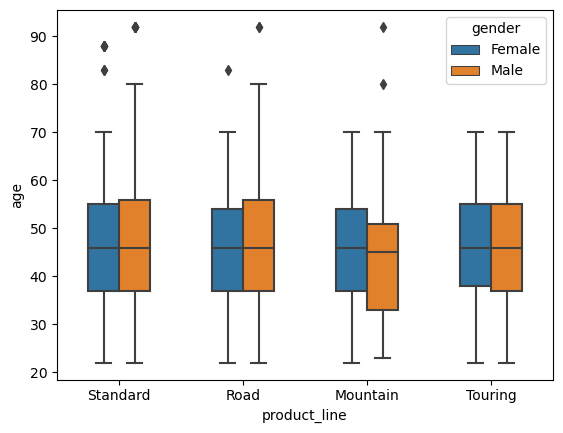

In [30]:
sns.boxplot(x='product_line',y='age',hue='gender',data=df, order=None,hue_order=None,color=None,saturation=.75,width=.5,notch=False,ax=None)

d:\python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


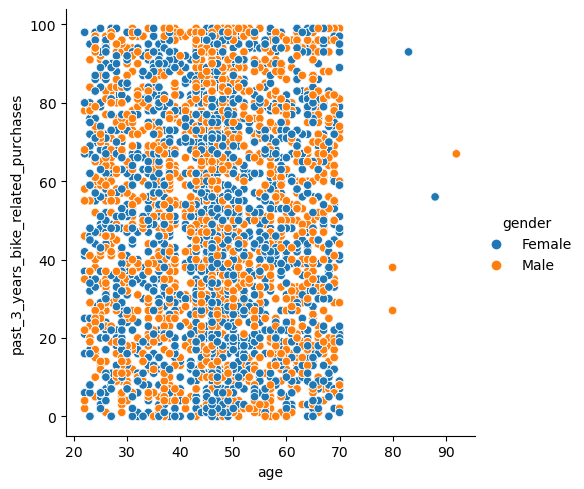

In [31]:
# relational plot
sns.relplot(data=df,x="age",y="past_3_years_bike_related_purchases",hue="gender")

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Health'),
  Text(1, 0, 'Financial Services'),
  Text(2, 0, 'IT'),
  Text(3, 0, 'Manufacturing'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'Agriculture'),
  Text(6, 0, 'Property'),
  Text(7, 0, 'Telecommunications'),
  Text(8, 0, 'Entertainment')])

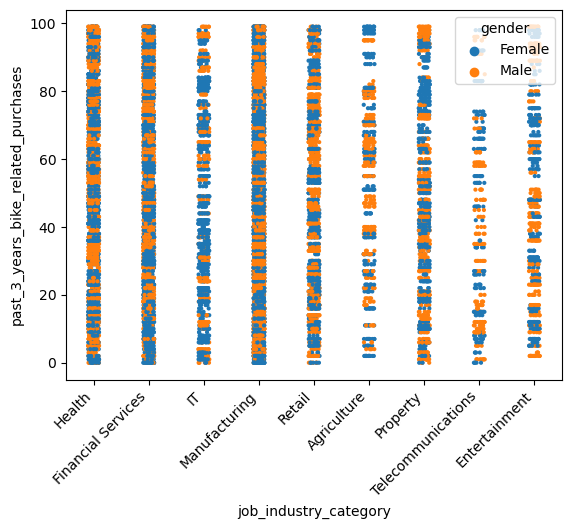

In [32]:
sns.stripplot(x = 'job_industry_category',y='past_3_years_bike_related_purchases',hue = 'gender',data= df, jitter = True, color = None, size=3,edgecolor="gray",linewidth=0)
plt.xticks(rotation=45, ha='right') 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Health'),
  Text(1, 0, 'Financial Services'),
  Text(2, 0, 'IT'),
  Text(3, 0, 'Manufacturing'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'Agriculture'),
  Text(6, 0, 'Property'),
  Text(7, 0, 'Telecommunications'),
  Text(8, 0, 'Entertainment')])

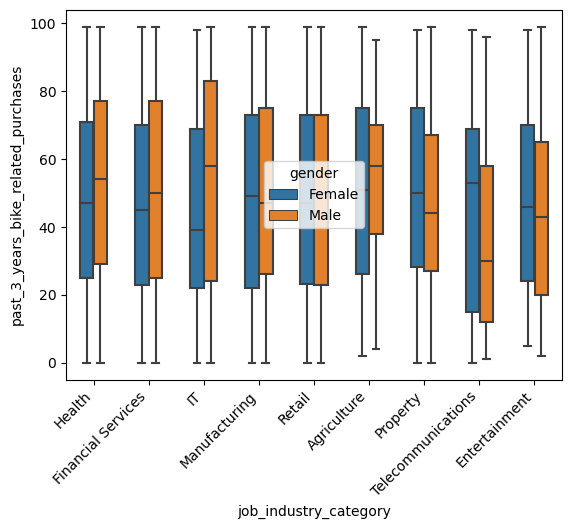

In [33]:
sns.boxplot(x='job_industry_category',y='past_3_years_bike_related_purchases',hue='gender',data=df, order=None,hue_order=None,color=None,saturation=.75,width=.5,notch=False,ax=None)
plt.xticks(rotation=45, ha='right') 

<Axes: xlabel='gender', ylabel='past_3_years_bike_related_purchases'>

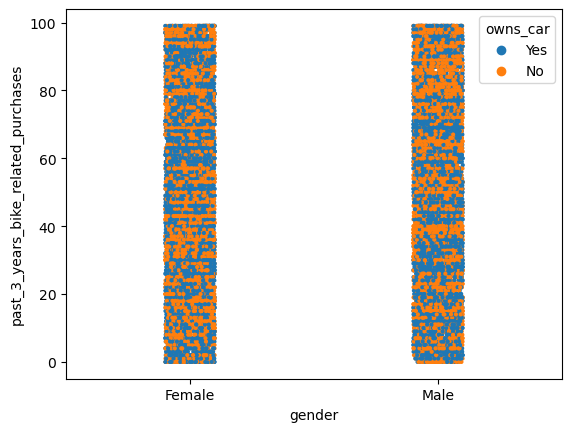

In [34]:
sns.stripplot(x = 'gender',y='past_3_years_bike_related_purchases',hue = 'owns_car',data= df, jitter = True, color = None, size=3,edgecolor="gray",linewidth=0)

<Axes: xlabel='gender', ylabel='past_3_years_bike_related_purchases'>

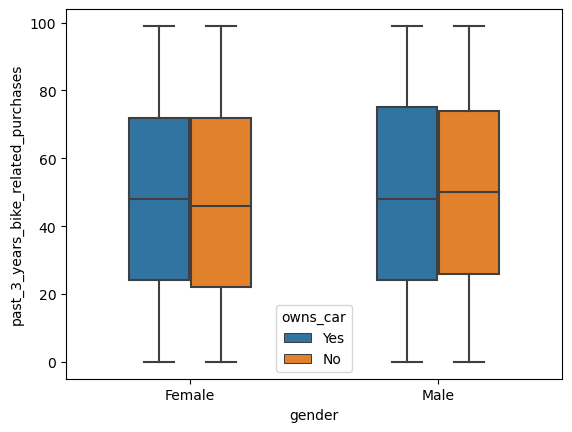

In [35]:
sns.boxplot(x='gender',y='past_3_years_bike_related_purchases',hue='owns_car',data=df, order=None,hue_order=None,color=None,saturation=.75,width=.5,notch=False,ax=None) 

the distribution is pretty symmetric 

# Cohort Analysis

In [36]:
dt.datetime(df['transaction_date'][1].year, df['transaction_date'][1].month, 1)

datetime.datetime(2017, 5, 1, 0, 0)

In [37]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [38]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
df['TransactionMonth'] = df['transaction_date'].apply(get_month)
df

,level_0,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,...,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,TransactionMonth
0,0,0,94,86,1,2017-12-23,False,Approved,OHM Cycles,Standard,...,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-12-01
1,10,5,13644,25,1,2017-05-19,False,Approved,Giant Bicycles,Road,...,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-05-01
2,8,2,5157,47,1,2017-05-11,True,Approved,Trek Bicycles,Road,...,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-05-01
3,7,3,9785,72,1,2017-01-05,False,Approved,Norco Bicycles,Standard,...,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-01-01
4,6,4,13424,2,1,2017-02-21,False,Approved,Solex,Standard,...,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,19964,19995,14870,22,3500,2017-01-11,False,Approved,WeareA2B,Standard,...,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-01-01
19964,19966,19992,6309,69,3500,2017-01-09,True,Approved,Giant Bicycles,Road,...,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-01-01
19965,19962,19994,8562,33,3500,2017-08-08,False,Approved,Giant Bicycles,Standard,...,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-08-01
19966,19963,19993,8416,74,3500,2017-02-16,False,Approved,WeareA2B,Standard,...,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-02-01


In [39]:
df.groupby('customer_id')['TransactionMonth'].min()

customer_id
1      2017-01-01
2      2017-05-01
4      2017-04-01
5      2017-03-01
6      2017-01-01
          ...    
3496   2017-03-01
3497   2017-09-01
3498   2017-02-01
3499   2017-01-01
3500   2017-01-01
Name: TransactionMonth, Length: 3489, dtype: datetime64[ns]

In [40]:
df.groupby('customer_id')['TransactionMonth'].transform('min')

0       2017-01-01
1       2017-01-01
2       2017-01-01
3       2017-01-01
4       2017-01-01
           ...    
19963   2017-01-01
19964   2017-01-01
19965   2017-01-01
19966   2017-01-01
19967   2017-01-01
Name: TransactionMonth, Length: 19968, dtype: datetime64[ns]

In [41]:
# Grouping by customer_id and select the InvoiceMonth value
# Assigning a minimum InvoiceMonth value to the dataset
df['CohortMonth'] = df.groupby('customer_id')['TransactionMonth'].transform('min')
# printing top 5 rows
print(df.head())

   level_0  index  transaction_id  product_id customer_id transaction_date  \
0        0      0              94          86           1       2017-12-23   
1       10      5           13644          25           1       2017-05-19   
2        8      2            5157          47           1       2017-05-11   
3        7      3            9785          72           1       2017-01-05   
4        6      4           13424           2           1       2017-02-21   

   online_order order_status           brand product_line  ...  \
0         False     Approved      OHM Cycles     Standard  ...   
1         False     Approved  Giant Bicycles         Road  ...   
2          True     Approved   Trek Bicycles         Road  ...   
3         False     Approved  Norco Bicycles     Standard  ...   
4         False     Approved           Solex     Standard  ...   

  deceased_indicator owns_car  tenure             address  postcode  \
0                  N      Yes    11.0  060 Morning Avenue      

In [42]:
df.sort_values(['customer_id'])

,level_0,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,TransactionMonth,CohortMonth
0,0,0,94,86,1,2017-12-23,False,Approved,OHM Cycles,Standard,...,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-12-01,2017-01-01
10,5,8,15663,32,1,2017-06-04,True,Approved,Giant Bicycles,Standard,...,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-06-01,2017-01-01
8,2,9,16423,9,1,2017-12-09,True,Approved,OHM Cycles,Road,...,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-12-01,2017-01-01
7,3,7,14931,31,1,2017-12-14,True,Approved,Giant Bicycles,Standard,...,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-12-01,2017-01-01
6,4,6,14486,23,1,2017-03-27,False,Approved,Norco Bicycles,Mountain,...,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-03-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19964,19966,19992,6309,69,3500,2017-01-09,True,Approved,Giant Bicycles,Road,...,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-01-01,2017-01-01
19966,19963,19993,8416,74,3500,2017-02-16,False,Approved,WeareA2B,Standard,...,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-02-01,2017-01-01
19962,19965,19991,2463,2,3500,2017-04-25,False,Approved,Solex,Standard,...,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-04-01,2017-01-01
19963,19964,19995,14870,22,3500,2017-01-11,False,Approved,WeareA2B,Standard,...,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-01-01,2017-01-01


In [43]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(df, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

In [44]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
df['CohortIndex'] = years_diff * 12 + months_diff  + 1
df.head(5)

,level_0,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,...,owns_car,tenure,address,postcode,state,country,property_valuation,TransactionMonth,CohortMonth,CohortIndex
0,0,0,94,86,1,2017-12-23,False,Approved,OHM Cycles,Standard,...,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-12-01,2017-01-01,12
1,10,5,13644,25,1,2017-05-19,False,Approved,Giant Bicycles,Road,...,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-05-01,2017-01-01,5
2,8,2,5157,47,1,2017-05-11,True,Approved,Trek Bicycles,Road,...,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-05-01,2017-01-01,5
3,7,3,9785,72,1,2017-01-05,False,Approved,Norco Bicycles,Standard,...,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-01-01,2017-01-01,1
4,6,4,13424,2,1,2017-02-21,False,Approved,Solex,Standard,...,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-02-01,2017-01-01,2


In [45]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1352
1,2017-01-01,2,486
2,2017-01-01,3,507
3,2017-01-01,4,509
4,2017-01-01,5,501


# Retention metrics

In [46]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1352.0,486.0,507.0,509.0,501.0,483.0,517.0,529.0,499.0,530.0,497.0,516.0
2017-02-01,799.0,324.0,297.0,313.0,287.0,298.0,308.0,280.0,329.0,308.0,296.0,NaN
2017-03-01,483.0,166.0,173.0,167.0,182.0,183.0,172.0,211.0,189.0,180.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,121.0,44.0,43.0,47.0,46.0,45.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.2,39.1,36.9,39.2,36.8,38.2
2017-02-01,100.0,40.6,37.2,39.2,35.9,37.3,38.5,35.0,41.2,38.5,37.0,NaN
2017-03-01,100.0,34.4,35.8,34.6,37.7,37.9,35.6,43.7,39.1,37.3,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.4,35.5,38.8,38.0,37.2,43.8,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


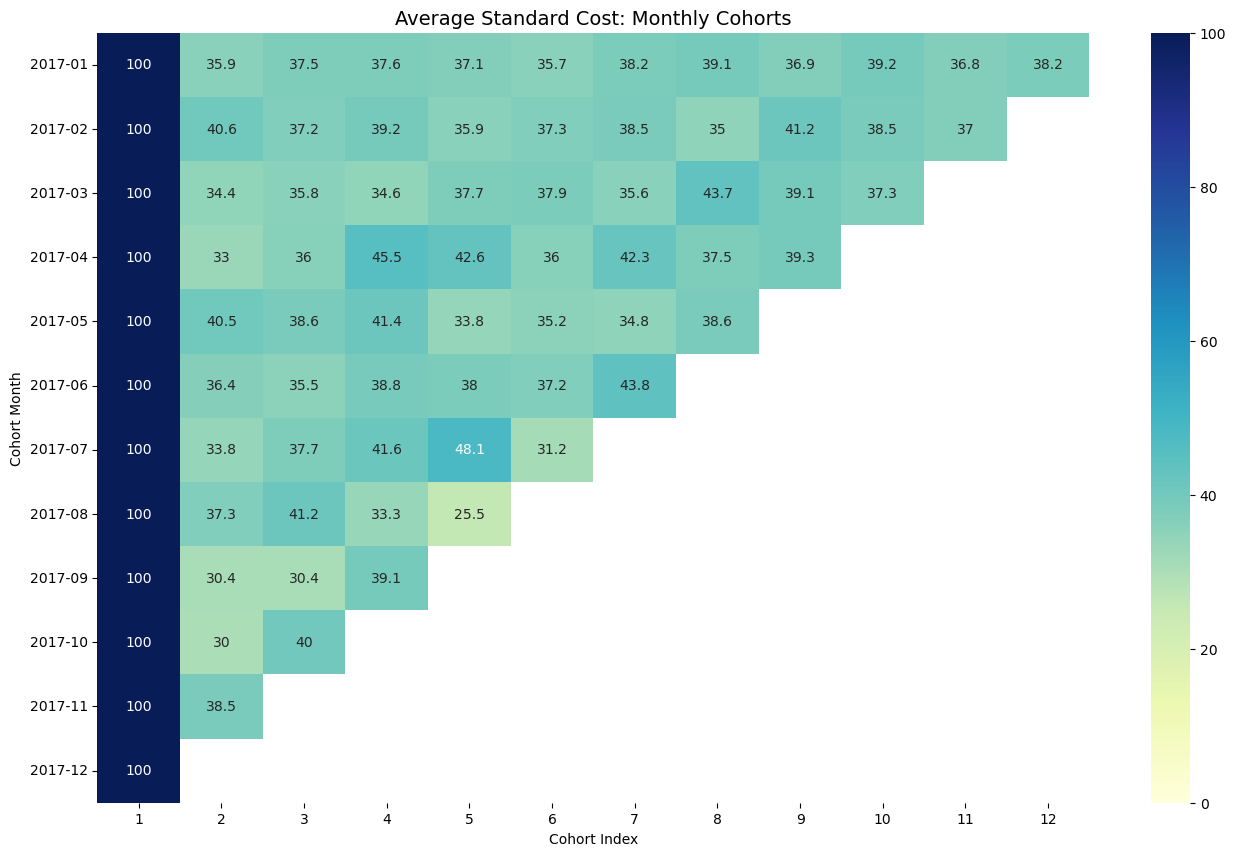

In [48]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='horizontal')
plt.show()

# Root cause Analysis

In [49]:
df_48 = df[(df['CohortMonth'] == '2017-07-01') & (df['CohortIndex'] == 5)]

In [50]:
df_31 = df[(df['CohortMonth'] == '2017-07-01') & (df['CohortIndex'] == 6)]

In [51]:
df_root = df_48.merge(df_31, how ='left', on = 'customer_id')
df_root

,level_0_x,index_x,transaction_id_x,product_id_x,customer_id,transaction_date_x,online_order_x,order_status_x,brand_x,product_line_x,...,owns_car_y,tenure_y,address_y,postcode_y,state_y,country_y,property_valuation_y,TransactionMonth_y,CohortMonth_y,CohortIndex_y
0,248,277,19710,93,45,2017-11-17,True,Approved,WeareA2B,Standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,676,705,10186,87,119,2017-11-30,True,Approved,OHM Cycles,Standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,1070,1099,6243,9,188,2017-11-21,False,Approved,Norco Bicycles,Standard,...,Yes,13.000000,4179 Carioca Terrace,2220,NSW,Australia,11,2017-12-01,2017-07-01,6.0
3,1070,1099,6243,9,188,2017-11-21,False,Approved,Norco Bicycles,Standard,...,Yes,13.000000,4179 Carioca Terrace,2220,NSW,Australia,11,2017-12-01,2017-07-01,6.0
4,2542,2574,17493,50,437,2017-11-12,True,Approved,WeareA2B,Standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
5,3361,3393,16879,83,581,2017-11-07,True,Approved,Solex,Touring,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
6,3672,3701,4882,28,635,2017-11-21,False,Approved,Norco Bicycles,Standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
7,3673,3702,5828,69,635,2017-11-20,False,Approved,Giant Bicycles,Road,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
8,4221,4250,13989,48,726,2017-11-06,False,Approved,WeareA2B,Standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
9,5184,5211,10245,49,899,2017-11-11,True,Approved,Trek Bicycles,Road,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'WeareA2B'),
  Text(1, 0, 'OHM Cycles'),
  Text(2, 0, 'Norco Bicycles'),
  Text(3, 0, 'Solex'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'Trek Bicycles')])

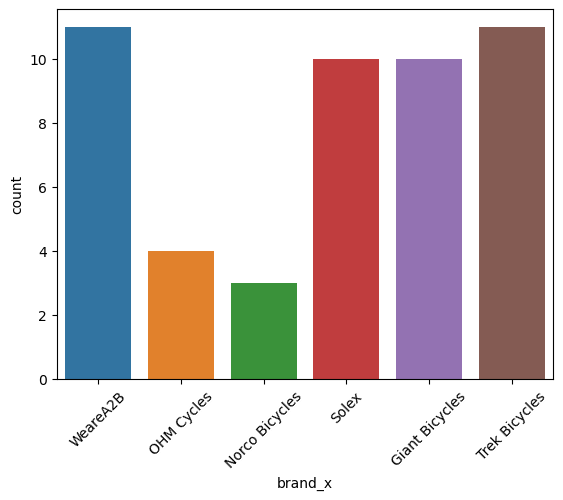

In [52]:
sns.countplot(x='brand_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'OHM Cycles'),
  Text(1, 0, 'WeareA2B'),
  Text(2, 0, 'Solex'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'Trek Bicycles')])

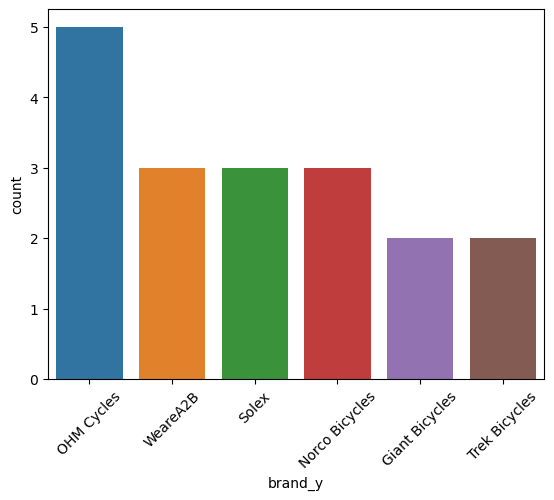

In [53]:
sns.countplot(x='brand_y', data=df_root)
plt.xticks(rotation=45)

d:\python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(13.819444444444445, 0.5, 'count')

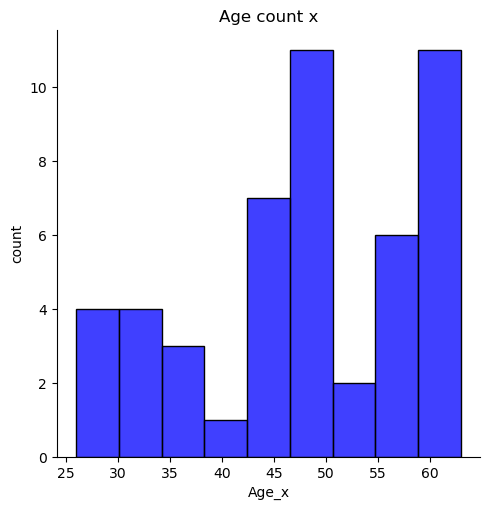

In [54]:
sns.displot(df_root['age_x'], kde=False, bins=9, color='blue', edgecolor='black')
plt.title('Age count x')
plt.xlabel('Age_x')
plt.ylabel('count')

d:\python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(22.694444444444443, 0.5, 'count')

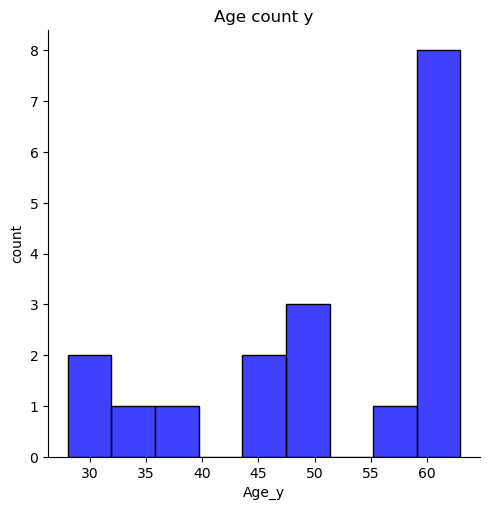

In [55]:
sns.displot(df_root['age_y'], kde=False, bins=9, color='blue', edgecolor='black')
plt.title('Age count y')
plt.xlabel('Age_y')
plt.ylabel('count')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'OHM Cycles'),
  Text(1, 0, 'WeareA2B'),
  Text(2, 0, 'Solex'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'Trek Bicycles')])

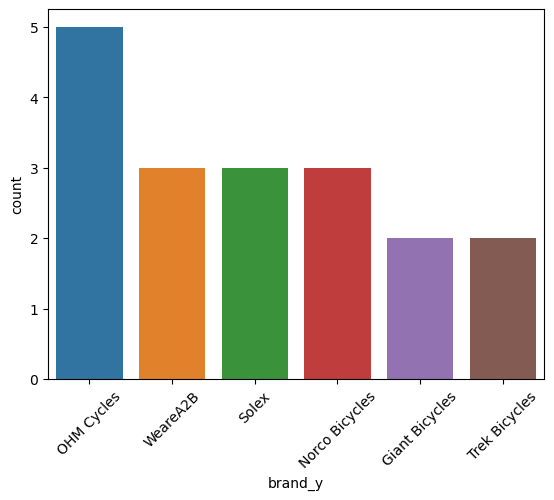

In [56]:
sns.countplot(x='brand_y', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Standard'), Text(1, 0, 'Touring'), Text(2, 0, 'Road')])

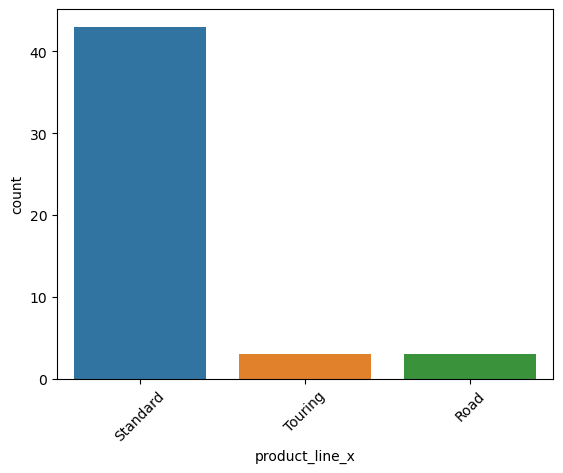

In [57]:
sns.countplot(x='product_line_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Standard'), Text(1, 0, 'Touring'), Text(2, 0, 'Road')])

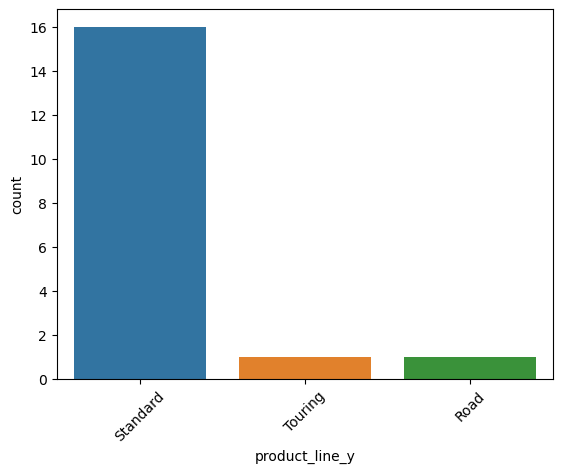

In [58]:
sns.countplot(x='product_line_y', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'medium'), Text(1, 0, 'small'), Text(2, 0, 'large')])

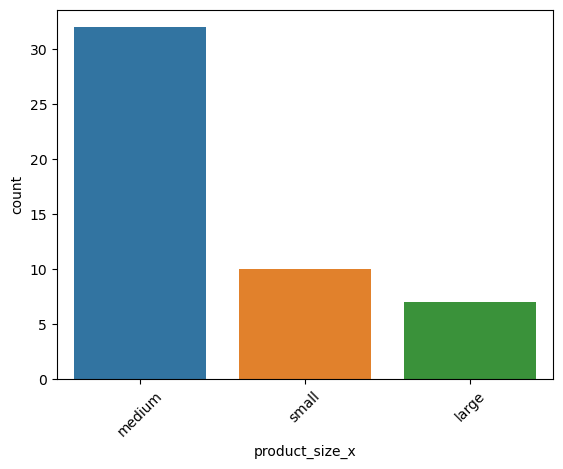

In [59]:
sns.countplot(x='product_size_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'medium'), Text(1, 0, 'large'), Text(2, 0, 'small')])

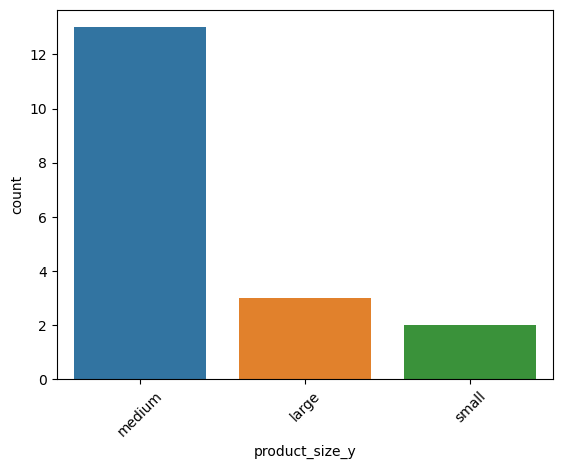

In [60]:
sns.countplot(x='product_size_y', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Mass Customer'),
  Text(1, 0, 'High Net Worth'),
  Text(2, 0, 'Affluent Customer')])

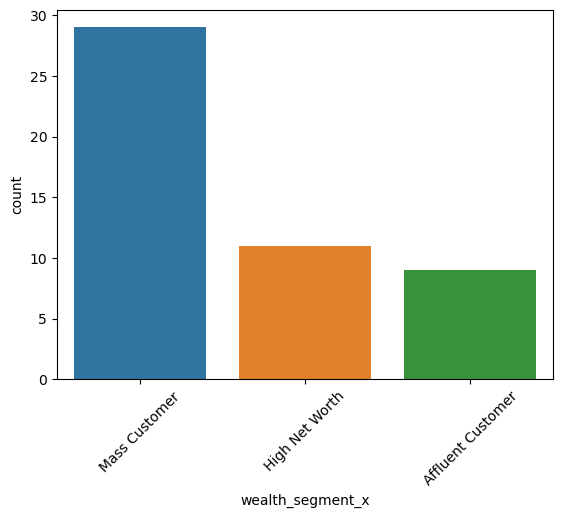

In [61]:
sns.countplot(x='wealth_segment_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Mass Customer'),
  Text(1, 0, 'High Net Worth'),
  Text(2, 0, 'Affluent Customer')])

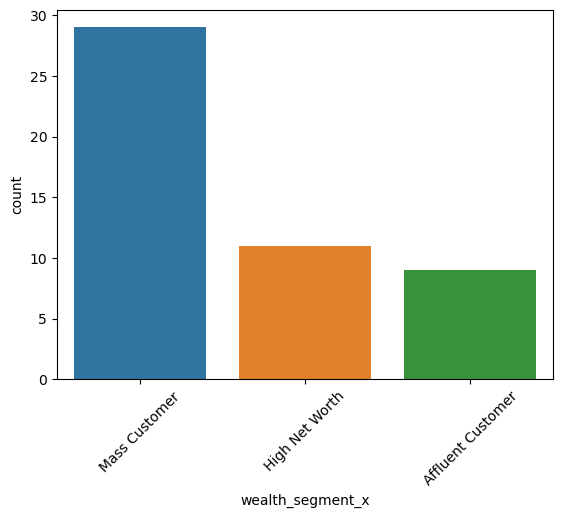

In [62]:
sns.countplot(x='wealth_segment_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

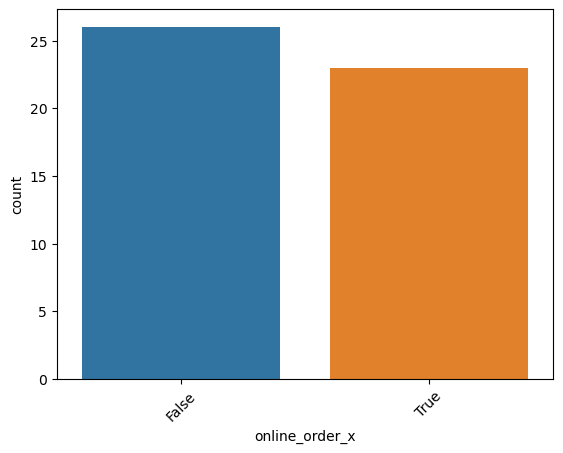

In [63]:
sns.countplot(x='online_order_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

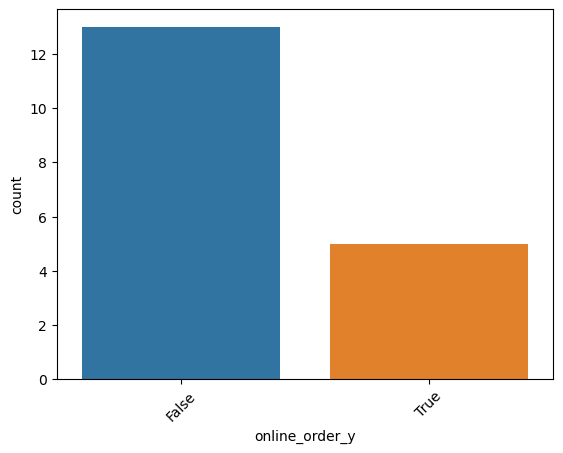

In [64]:
sns.countplot(x='online_order_y', data=df_root)
plt.xticks(rotation=45)

# retention rate 48 的这部分人年龄更集中于中年人40-50， 31的更集中于老年人60岁左右。 48这部分人有车的人比31的更多

# RFM model

In [65]:
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,94,86,1,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.070000,38482
2,3765,38,1,2017-04-06,True,Approved,Solex,Standard,medium,medium,1577.53,826.510000,39526
3,5157,47,1,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,37823
4,9785,72,1,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.300000,37873
5,13424,2,1,2017-02-21,False,Approved,Solex,Standard,medium,medium,71.49,53.620000,38573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,14870,22,3500,2017-01-11,False,Approved,WeareA2B,Standard,medium,medium,60.34,45.260000,34165
19997,19836,40,3500,2017-03-14,True,Approved,OHM Cycles,Standard,high,medium,1458.17,874.900000,38750
19998,8708,0,5034,2017-10-07,False,Approved,Solex,Road,medium,medium,416.98,312.735016,42218
19999,16701,0,5034,2017-01-27,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667


In [66]:
# Convert transaction_date to datetime format
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])

# Define the reference date for recency calculation (assuming the latest date in the dataset)
reference_date = transaction_df['transaction_date'].max()

# Calculate RFM metrics
rfm_df = transaction_df.groupby('customer_id').agg({
    'transaction_date': lambda x: (reference_date - x.max()).days,
    'customer_id': 'count',
    'list_price': 'sum'
}).rename(columns={
    'transaction_date': 'Recency',
    'customer_id': 'Frequency',
    'list_price': 'Monetary'
}).reset_index()

# Display the first few rows of the RFM dataframe
rfm_df.head()

,customer_id,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,8,9888.23
3,4,195,2,1047.72
4,5,16,6,5903.20


In [67]:
# Assign scores to Recency, Frequency, and Monetary using quantiles
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores into a single RFM score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

rfm_df.head()


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1,7,11,9084.45,5,5,5,555
1,2,128,3,4149.07,1,1,2,112
2,3,102,8,9888.23,1,4,5,145
3,4,195,2,1047.72,1,1,1,111
4,5,16,6,5903.20,4,3,3,433


Segment
Least Purchase     993
Others             887
Loyal Customers    744
Big Spenders       741
Best Customers     129
Name: count, dtype: int64


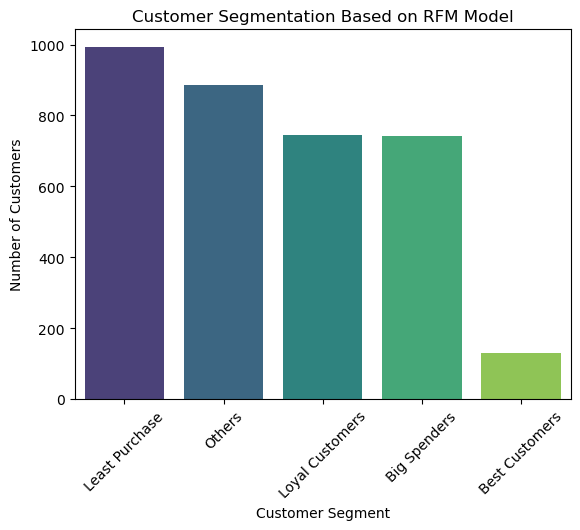

In [68]:
def segment_customer(df):
    if df['RFM_Score'] == '555':
        return 'Best Customers'
    elif df['R_Score'] in [4, 5] and df['F_Score'] in [3, 4, 5]:
        return 'Loyal Customers'
    elif df['M_Score'] in [4, 5]:
        return 'Big Spenders'
    elif df['R_Score'] in [1, 2]:
        return 'Least Purchase'
    else:
        return 'Others'

# Apply the segmentation function again
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# Display the count of customers in each segment
segment_counts = rfm_df['Segment'].value_counts()
print(segment_counts)

# Plotting the updated segments
sns.countplot(x='Segment', data=rfm_df, order=rfm_df['Segment'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title('Customer Segmentation Based on RFM Model')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()
